In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [11]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [13]:


# حذف سطرهایی که مقدار Address گمشده دارند
df = df.dropna(subset=['Address'])

# تبدیل ستون Area به عدد (float)
def clean_area(x):
    try:
        return float(x)
    except:
        return np.nan

df['Area'] = df['Area'].apply(clean_area)

# حذف سطرهایی که Area مقدار NaN دارند یا خیلی بزرگ هستند
df = df.dropna(subset=['Area'])
df = df[df['Area'] < 10000]  # این عدد می‌تواند بر اساس دامنه منطقی تغییر کند

# نمایش اطلاعات پس از پیش‌پردازش
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   float64
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   bool   
 3   Warehouse   3450 non-null   bool   
 4   Elevator    3450 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 171.8+ KB
None
    Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63.0     1     True       True      True         Shahran  1.850000e+09   
1   60.0     1     True       True      True         Shahran  1.850000e+09   
2   79.0     2     True       True      True          Pardis  5.500000e+08   
3   95.0     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123.0     2     Tr

In [15]:
# فرض کنیم df همون دیتافریم پاکسازی شده‌ات باشه

# استفاده از pandas برای One-Hot Encoding ستون Address
df_encoded = pd.get_dummies(df, columns=['Address'], drop_first=True)

# نمایش چند سطر اول برای بررسی
print(df_encoded.head())

    Area  Room  Parking  Warehouse  Elevator         Price  Price(USD)  \
0   63.0     1     True       True      True  1.850000e+09    61666.67   
1   60.0     1     True       True      True  1.850000e+09    61666.67   
2   79.0     2     True       True      True  5.500000e+08    18333.33   
3   95.0     2     True       True      True  9.025000e+08    30083.33   
4  123.0     2     True       True      True  7.000000e+09   233333.33   

   Address_Abbasabad  Address_Absard  Address_Abuzar  ...  Address_Waterfall  \
0              False           False           False  ...              False   
1              False           False           False  ...              False   
2              False           False           False  ...              False   
3              False           False           False  ...              False   
4              False           False           False  ...              False   

   Address_West Ferdows Boulevard  Address_West Pars  Address_Yaftabad  \


In [17]:
df_encoded = df_encoded.astype({col: 'int8' for col in df_encoded.columns if col.startswith('Address_')})


In [21]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [23]:
np.sum(df.isnull())

C:\Users\user\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [29]:
# تبدیل ستون‌های مربوط به آدرس (Address_*) از بولی به عدد 0 و 1
df_encoded = df_encoded.astype({col: 'int8' for col in df_encoded.columns if col.startswith('Address_')})

# پیدا کردن همه ستون‌های بولی باقی‌مانده (مثل Parking, Warehouse, Elevator)
bool_cols = df_encoded.select_dtypes(include=['bool']).columns

# تبدیل این ستون‌های بولی به عددی (0 و 1)
df_encoded[bool_cols] = df_encoded[bool_cols].astype('int8')

# بررسی نتیجه
print(df_encoded[bool_cols].dtypes)
print(df_encoded.head())


Parking      int8
Warehouse    int8
Elevator     int8
dtype: object
    Area  Room  Parking  Warehouse  Elevator         Price  Price(USD)  \
0   63.0     1        1          1         1  1.850000e+09    61666.67   
1   60.0     1        1          1         1  1.850000e+09    61666.67   
2   79.0     2        1          1         1  5.500000e+08    18333.33   
3   95.0     2        1          1         1  9.025000e+08    30083.33   
4  123.0     2        1          1         1  7.000000e+09   233333.33   

   Address_Abbasabad  Address_Absard  Address_Abuzar  ...  Address_Waterfall  \
0                  0               0               0  ...                  0   
1                  0               0               0  ...                  0   
2                  0               0               0  ...                  0   
3                  0               0               0  ...                  0   
4                  0               0               0  ...                  0   

   Add

In [31]:
np.sum(df.duplicated())

208

In [33]:
df = df.drop_duplicates()
print(f'تعداد سطرها بعد از حذف تکراری‌ها: {len(df)}')


تعداد سطرها بعد از حذف تکراری‌ها: 3242


In [37]:
df['Price'].mean()

5473623380.6573105

In [39]:
df['Price'].std()

8272617136.587953

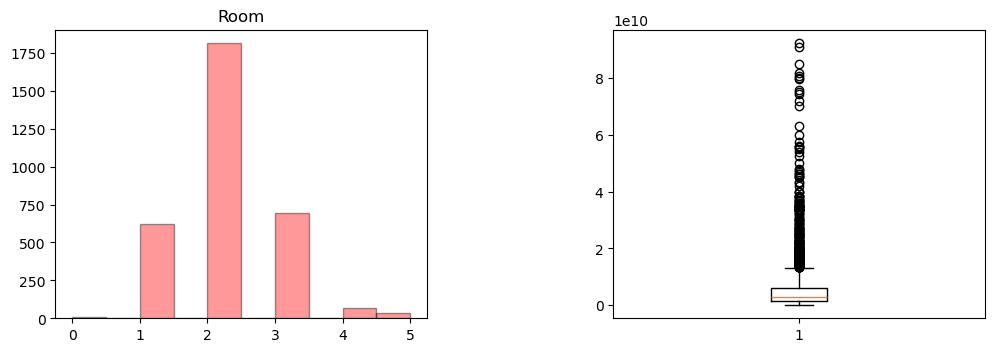

In [41]:
plt.boxplot(df['Price'])
plt.show()

In [43]:
print(df['Price'].median())


2970000000.0


In [45]:
# محاسبه چارک‌ها و IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# تعریف بازه مجاز بدون داده‌های پرت
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# حذف داده‌های پرت از دیتافریم
df_clean = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)].copy()

print(f'تعداد نمونه‌ها قبل از حذف پرت: {len(df)}')
print(f'تعداد نمونه‌ها بعد از حذف پرت: {len(df_clean)}')
print(f'میانگین جدید قیمت‌ها: {df_clean["Price"].mean()}')
print(f'میانه جدید قیمت‌ها: {df_clean["Price"].median()}')


تعداد نمونه‌ها قبل از حذف پرت: 3242
تعداد نمونه‌ها بعد از حذف پرت: 2965
میانگین جدید قیمت‌ها: 3556670489.068465
میانه جدید قیمت‌ها: 2600000000.0


In [51]:
print(df_clean['Price'].mean())


3556670489.068465


In [53]:
print(df_clean['Price'].std())

2999545211.7834134


In [55]:
print(df_clean['Price'].median())

2600000000.0


In [57]:
X = df.iloc[:, :5] 
y = df.iloc[:, -1]

In [59]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 101)

In [61]:
# Standardize
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
StandardScaler()
X_train_scaled=sc.transform(X_train)
X_train_scaled1 = sc.fit_transform(X_train)
X_train_scaled

array([[-0.78152337, -1.40311193,  0.4278902 ,  0.3064731 ,  0.52001105],
       [-0.1605488 , -0.09043627,  0.4278902 ,  0.3064731 ,  0.52001105],
       [-0.50553467, -0.09043627,  0.4278902 ,  0.3064731 ,  0.52001105],
       ...,
       [ 0.07404159, -0.09043627,  0.4278902 ,  0.3064731 ,  0.52001105],
       [-0.21574654, -0.09043627,  0.4278902 ,  0.3064731 ,  0.52001105],
       [-0.1605488 , -0.09043627,  0.4278902 ,  0.3064731 ,  0.52001105]])

In [63]:
col=X.columns
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col)
X_train_scaled

,Area,Room,Parking,Warehouse,Elevator
0,-0.781523,-1.403112,0.42789,0.306473,0.520011
1,-0.160549,-0.090436,0.42789,0.306473,0.520011
2,-0.505535,-0.090436,0.42789,0.306473,0.520011
3,-0.519334,-0.090436,0.42789,0.306473,0.520011
4,-0.091552,-0.090436,0.42789,0.306473,0.520011
...,...,...,...,...,...
1940,-0.671128,-0.090436,0.42789,0.306473,-1.923036
1941,6.118194,1.222239,0.42789,0.306473,-1.923036
1942,0.074042,-0.090436,0.42789,0.306473,0.520011
1943,-0.215747,-0.090436,0.42789,0.306473,0.520011


In [65]:
X_test_scaled=sc.transform(X_test)
col=X.columns
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col)
X_test_scaled

,Area,Room,Parking,Warehouse,Elevator
0,0.598420,1.222239,0.427890,0.306473,0.520011
1,0.018844,-0.090436,0.427890,0.306473,0.520011
2,0.253434,1.222239,0.427890,0.306473,0.520011
3,-0.574532,-0.090436,0.427890,0.306473,0.520011
4,-0.229546,-0.090436,0.427890,0.306473,0.520011
...,...,...,...,...,...
1292,-0.395139,-0.090436,0.427890,0.306473,-1.923036
1293,-0.615930,-0.090436,0.427890,0.306473,0.520011
1294,-0.477936,-0.090436,-2.337048,0.306473,-1.923036
1295,-0.436537,-0.090436,-2.337048,-3.262929,-1.923036


In [67]:
X_train= X_train_scaled
X_test= X_test_scaled

In [69]:
# Creating and Training the Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
LinearRegression()

LinearRegression()

In [71]:
# Find Model Coefficients
# print the intercept(b0)
print(lm.intercept_)

176796.83121850903


In [73]:
# print the coefficients(b1, b2, ...)
print(lm.coef_)

[146089.90205896  54369.33491427  -4891.00273097  11831.01311145
  14231.84826454]


In [75]:
# Prediction
predictions = lm.predict(X_test)
#y hat
predictions

array([339606.1045119 , 183566.56203033, 289207.15240611, ...,
        89746.31636979,  53564.54592896, 120483.47581936])

In [77]:
# مقایسه ایگرگ های تست و مقدار پیش بینی شده
sns.scatterplot(x=y_test, y=predictions)

<Axes: xlabel='Price(USD)'>

In [79]:
# Residual Histogram

residual= y_test-predictions
sns.distplot(residual,bins=50);

C:\Users\user\AppData\Local\Temp\ipykernel_12956\540702191.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,bins=50);


In [81]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', np.sqrt(metrics.r2_score(y_test, predictions)))

MAE: 100106.45224183513
MSE: 33000496405.215736
RMSE: 181660.3875510997
R2: 0.7674851724334564
